In [114]:
%pip install spacy
%pip install numpy
%pip install wordcloud
%pip install matplotlib


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\danil\appdata\roaming\python\python311\site-packages (3.8.0)




[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
from pathlib import Path
from nltk import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [116]:
def book_analyze(title: str, book: str) -> None:
    stopwords_ru = stopwords.words("russian")
    stopwords_ru.extend(["это"])
    book_tokenized = word_tokenize(book.lower())
    token_n = len(book_tokenized)
    filtered_tokens = [w for w in book_tokenized if not w in stopwords_ru]
    filtered_tokens = [w for w in filtered_tokens if w.isalpha()]
    filtered_n = len(filtered_tokens)
    freq_distribution = FreqDist(filtered_tokens)

    print(title)
    print(f"Character Count: {len(book)}")
    print(f"Number of Tokens: {token_n}")
    print(f"Number of Tokens Without Stop Words: {filtered_n}")
    print(f"Ratio: {filtered_n / token_n}")
    print(f"Most common words: {freq_distribution.most_common(10)}")
    print(f"Pizdets occurances: {freq_distribution.get('пиздец')}")
    freq_distribution.plot(30, cumulative=False)

    wc = WordCloud()
    wc.generate(" ".join(freq_distribution))
    plt.title("Word Map")
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()

    wc.generate_from_frequencies(freq_distribution)
    plt.title("Frequency Distribution Word Map")
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()

    print("\n")

In [117]:
p = Path("./")
book_paths = p.glob("**/*.txt")

./books/Generation_P.txt
Character Count: 479477
Number of Tokens: 95489
Number of Tokens Without Stop Words: 41554
Ratio: 0.4351705432039292
Most common words: [('татарский', 765), ('сказал', 372), ('морковин', 135), ('спросил', 129), ('татарского', 123), ('просто', 116), ('несколько', 115), ('очень', 103), ('азадовский', 94), ('понял', 93)]
Pizdets occurances: 3


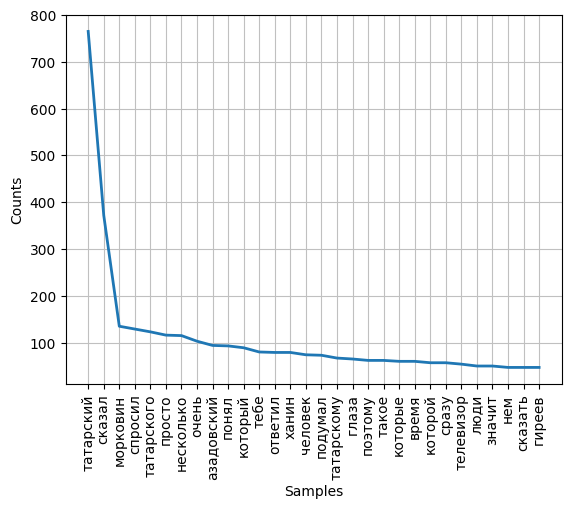

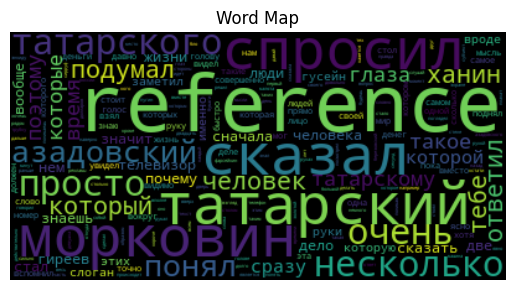

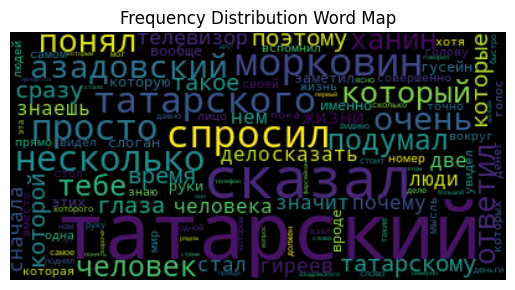

In [119]:
with open("./books/Generation_P.txt", encoding="utf-8-sig") as f:
    book_analyze(f.name, f.read())

Empire_V.txt
Character Count: 560583
Number of Tokens: 113202
Number of Tokens Without Stop Words: 48458
Ratio: 0.42806664193212135
Most common words: [('сказал', 486), ('спросил', 197), ('энлиль', 184), ('маратович', 171), ('просто', 164), ('локи', 150), ('ответил', 148), ('гера', 145), ('понял', 143), ('митра', 131)]
Pizdets occurances: 3


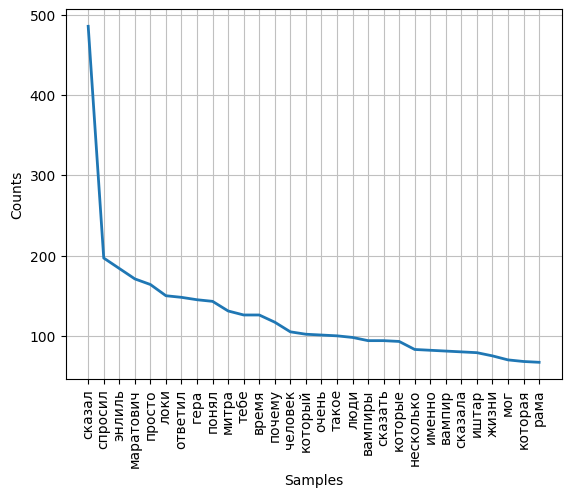

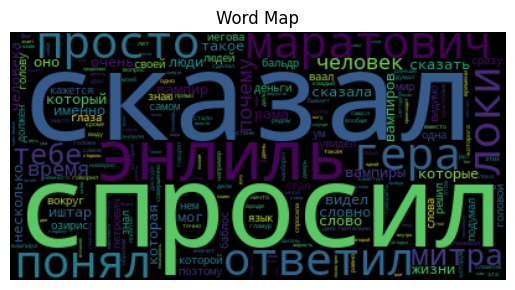

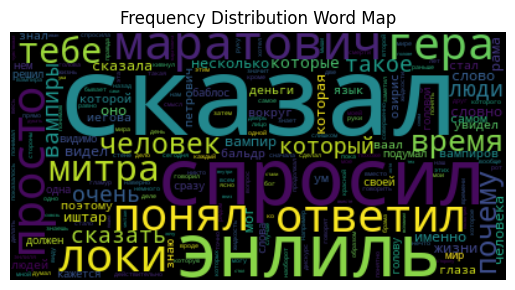



Generation_P.txt
Character Count: 479477
Number of Tokens: 95489
Number of Tokens Without Stop Words: 41554
Ratio: 0.4351705432039292
Most common words: [('татарский', 765), ('сказал', 372), ('морковин', 135), ('спросил', 129), ('татарского', 123), ('просто', 116), ('несколько', 115), ('очень', 103), ('азадовский', 94), ('понял', 93)]
Pizdets occurances: 3


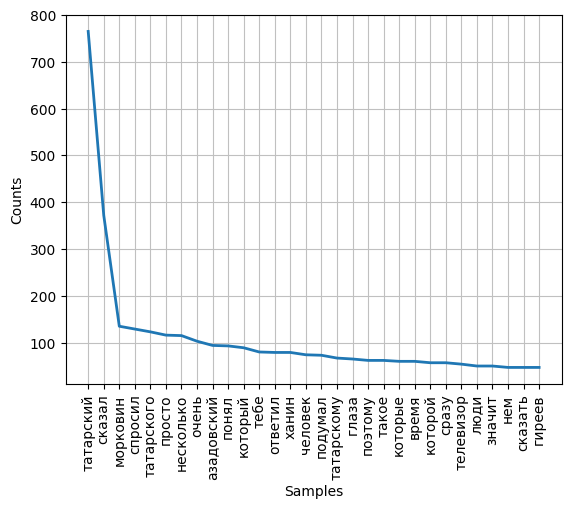

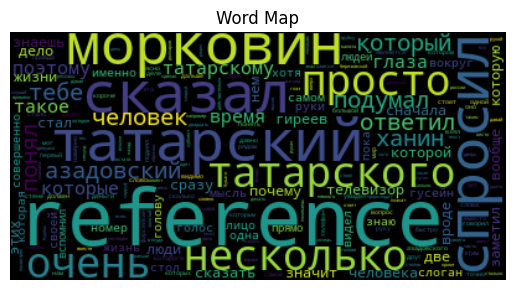

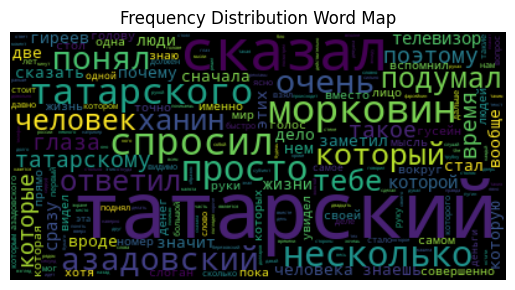



KGBT_plus.txt
Character Count: 615640
Number of Tokens: 117233
Number of Tokens Without Stop Words: 53973
Ratio: 0.4603908455810224
Most common words: [('просто', 219), ('сказал', 186), ('герда', 171), ('время', 154), ('именно', 128), ('барон', 117), ('поэтому', 105), ('мозг', 90), ('монах', 89), ('несколько', 88)]
Pizdets occurances: None


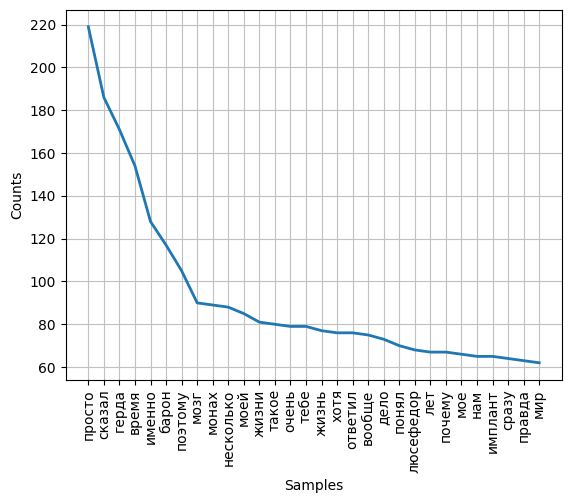

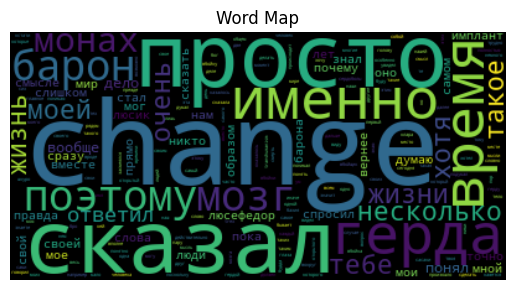

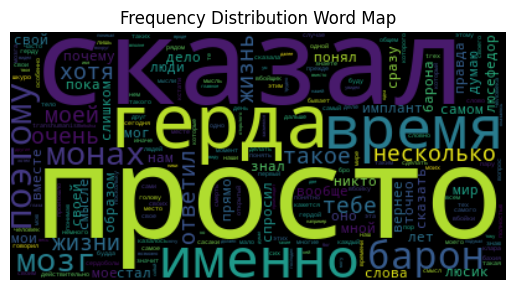



Omon_Ra.txt
Character Count: 202316
Number of Tokens: 39555
Number of Tokens Without Stop Words: 18167
Ratio: 0.45928454051320944
Most common words: [('сказал', 120), ('очень', 67), ('полета', 66), ('несколько', 65), ('начальник', 56), ('понял', 49), ('время', 46), ('сразу', 40), ('митёк', 40), ('глаза', 35)]
Pizdets occurances: 1


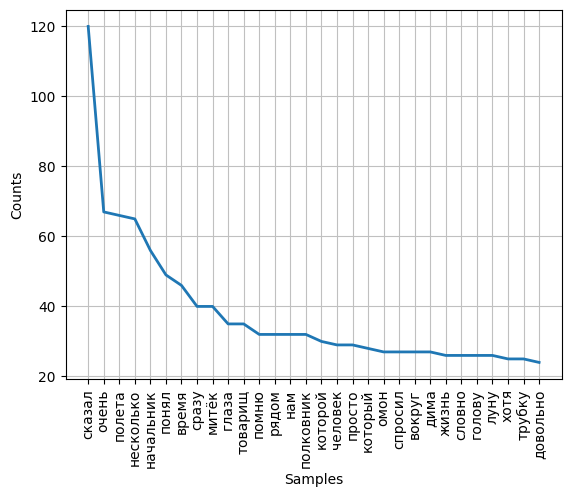

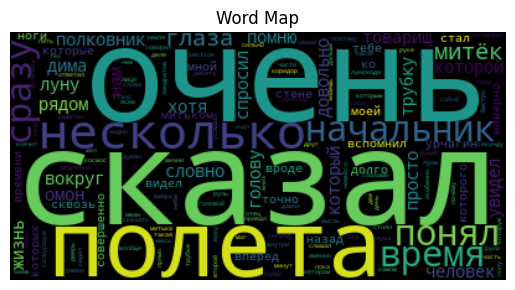

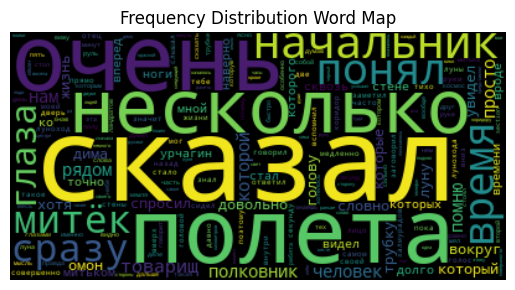



Secret_Views_of_Mount_Fuji.txt
Character Count: 551266
Number of Tokens: 107670
Number of Tokens Without Stop Words: 47831
Ratio: 0.4442370205256803
Most common words: [('таня', 598), ('сказал', 234), ('дамиан', 226), ('очень', 168), ('просто', 159), ('кларисса', 155), ('юра', 136), ('ринат', 125), ('такое', 122), ('сказала', 119)]
Pizdets occurances: None


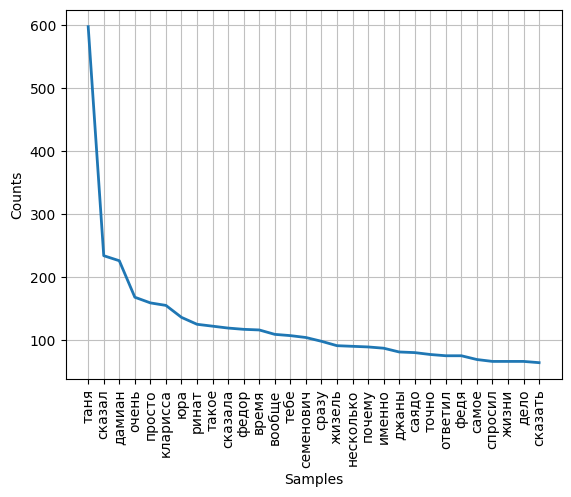

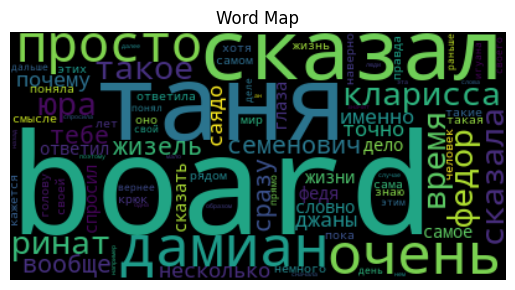

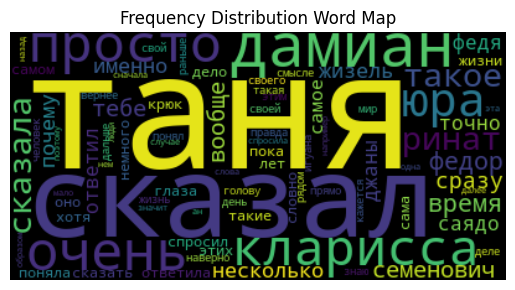



Yellow_Arrow.txt
Character Count: 87799
Number of Tokens: 17744
Number of Tokens Without Stop Words: 7802
Ratio: 0.4396979260595131
Most common words: [('андрей', 210), ('сказал', 134), ('спросил', 40), ('хан', 36), ('петр', 35), ('сергеевич', 35), ('несколько', 34), ('окна', 29), ('просто', 26), ('гриша', 25)]
Pizdets occurances: None


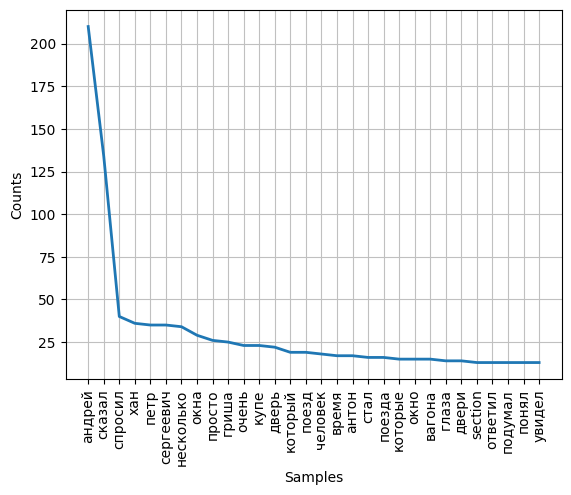

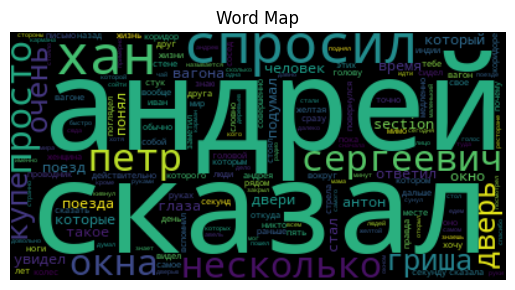

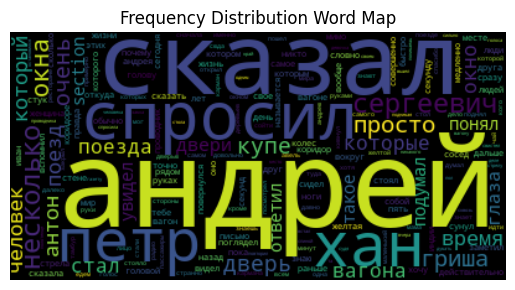

In [120]:
for bp in book_paths:
    book_analyze(bp.name, bp.read_text(encoding="utf-8-sig"))